# Assignment 2(due on 11/08)

## Student:徐嘉玉（12231090），Gtihub：XKimmy

## 批改人：吴昊天

## 得分：48/50

### PS1. Significant earthquakes since 2150 B.C.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import reliability as rel
import seaborn as sns
import math

In [2]:
Sig_Eqs = pd.read_csv("earthquakes-2023-11-06_10-35-19_+0800.tsv", sep='\t')
Sig_Eqs

,Search Parameters,Id,Year,Mo,...,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
1,NaN,1,-2150,NaN,...,NaN,NaN,NaN,NaN
2,NaN,2,-2000,NaN,...,NaN,NaN,NaN,NaN
3,NaN,3,-2000,NaN,...,NaN,1,NaN,NaN
4,NaN,5877,-1610,NaN,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6394,NaN,10708,2023,10,...,2862,4,250,3
6395,NaN,10711,2023,10,...,200,3,NaN,2
6396,NaN,10709,2023,10,...,NaN,NaN,NaN,NaN
6397,NaN,10710,2023,10,...,NaN,NaN,NaN,NaN


## 1.1 Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.

### Total number of deaths:

In [3]:
Sig_Eqs.groupby('Country').sum().sort_values('Total Deaths')[['Total Deaths']]


,Total Deaths
Country,
ZAMBIA,0
COTE D'IVOIRE,0
SRI LANKA,0
SOLOMON SEA,0
FRENCH GUIANA,0
FRENCH POLYNESIA,0
GABON,0
GERMANY,0
SLOVAKIA,0


### Top 10:

In [4]:
Sig_Eqs.groupby('Country').sum().sort_values('Total Deaths', ascending=False)[['Total Deaths']].head(10)


,Total Deaths
Country,
CHINA,2.04193e+06
TURKEY,995648
IRAN,758650
SYRIA,437700
ITALY,422679
JAPAN,356083
HAITI,323776
AZERBAIJAN,310119
INDONESIA,282819


## 1.2 Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, and then plot the time series. Do you observe any trend? Explain why or why not?

### Total number of earthquakes > 6.0 each year:

In [5]:
print(
    Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()['Mag']
)



Year
-2150     1
-2000     1
-1250     1
-1050     1
-479      1
         ..
2019     27
2020     15
2021     23
2022     20
2023     22
Name: Mag, Length: 536, dtype: int64


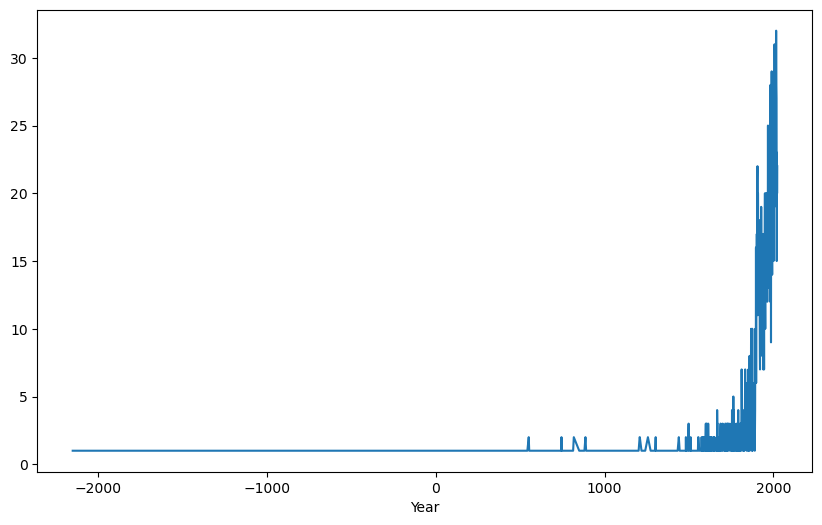

(-2250.0, 2023.0)

<Figure size 640x480 with 0 Axes>

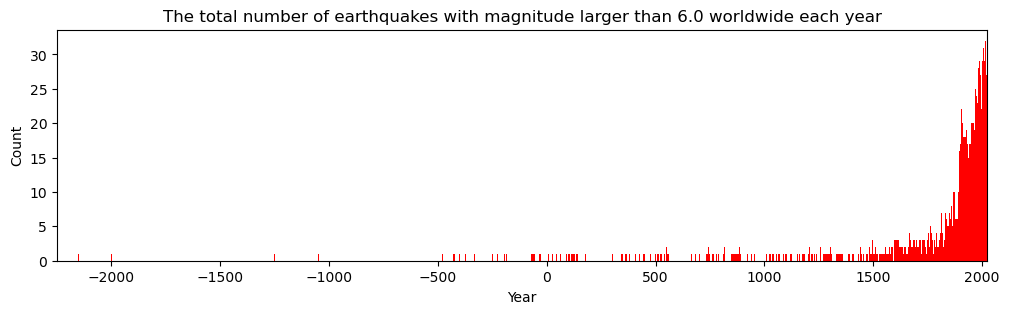

In [6]:
Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()['Mag'].plot()
plt.gcf().set_size_inches(10,6)
plt.show()

#根据年份画图
Sig_Eqs_2 = Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()['Mag']
plt.figure(2)
plt.figure(figsize=(12,3))
plt.bar(Sig_Eqs_2.index,Sig_Eqs_2,width=5,color='red')
plt.title(u'The total number of earthquakes with magnitude larger than 6.0 worldwide each year') #
plt.ylabel('Count') 
plt.xlabel('Year')
plt.xlim([min(Sig_Eqs_2.index)-100,max(Sig_Eqs_2.index)])
#The trend is upward. There may be scientific and technological progress, rising population density and other reasons. Nowadays we have more perfect earthquake monitoring and recording than before.

In the past 1,000 years, earthquakes have occurred with increasing frequency.

The reason of the increasing earthquakes may be due to modern technology and improved monitoring leading to more recorded earthquakes.

## 1.3 Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file, report your results in a descending order.

In [7]:
#All records by each country
Eqs_c = Sig_Eqs.groupby('Country').count()
Eqs_c

,Search Parameters,Id,Year,Mo,...,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
Country,,,,,,,,,
AFGHANISTAN,0,66,66,65,...,15,23,16,20
ALBANIA,0,56,56,48,...,6,17,3,4
ALGERIA,0,57,57,57,...,12,25,1,8
ANTARCTICA,0,5,5,5,...,0,0,0,0
ANTIGUA AND BARBUDA,0,3,3,3,...,0,0,0,0
ARGENTINA,0,21,21,21,...,3,7,1,2
ARMENIA,0,13,13,9,...,0,3,0,0
ATLANTIC OCEAN,0,6,6,6,...,0,0,0,0
AUSTRALIA,0,24,24,24,...,0,0,1,2


In [8]:
#Get the counts of earthquake
def Eqs_count(country):
    return Eqs_c.loc['%s'%(country)]['Year']

In [9]:
def CountEq_LargestEq(country):
    Eqs_largest = Sig_Eqs[['Country','Mag']].groupby('Country').max()['Mag'][country]
    
    
    if pd.isna(Eqs_largest) :
        df1 = Sig_Eqs[(Sig_Eqs['Country']==country)]
        
    else:
        df1 = Sig_Eqs[(Sig_Eqs['Mag']==Eqs_largest) & (Sig_Eqs['Country']==country)]

        
    # Output
    df2 = df1[['Year','Mo','Dy','Country','Mag']].groupby('Country').max()
    
    
    df2['Earthquake_Number'] = Eqs_count(country)
    
    return df2
                                                     
                                                     

In [10]:
Country_List = Sig_Eqs.groupby('Country').count().index

result = CountEq_LargestEq(Country_List[0])

for i in range(1,156):
    result = pd.concat([result,CountEq_LargestEq(Country_List[i])])

# Show dataframe 
result.sort_values('Mag',ascending = False)

,Year,Mo,Dy,Mag,Earthquake_Number
Country,,,,,
CHILE,1960,5,22,9.5,198
USA,1964,3,28,9.2,276
INDONESIA,2004,12,26,9.1,411
JAPAN,2011,3,11,9.1,414
RUSSIA,1952,11,4,9,152
PERU,1716,2,6,8.8,190
ECUADOR,1906,1,31,8.8,68
PHILIPPINES,1897,9,21,8.7,224
INDIA,1950,8,15,8.6,100


### 代码结果基本正确，功能满足要求，分析内容合理
### 在统计震级为6级以上的地震时，没有统计地震次数为0的情况。导致在很长一段时间内，图像都显示的是每年都存在一次6级以上的地震。
### 解决方案：1.可以绘制柱状图，避免单独连线；2.补充统计地震次数为0的情况进行绘制。
### 助教提供给您提供了绘图的参考代码，给您参考。
### 得分：24/25
### --------------------------------------------------------------------------------------------

### PS2. Wind speed in Shenzhen during the past 10 years

In [11]:
file = pd.read_csv('2281305.csv')
file

C:\Users\Wu\AppData\Local\Temp\ipykernel_9940\851517476.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('2281305.csv')


,STATION,DATE,SOURCE,REPORT_TYPE,...,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,...,4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,...,4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,...,4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,...,4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,...,4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,...,4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11T18:00:00,4,FM-15,...,4,"+0290,1","009999,1,9,9","180,1,N,0040,1"
111981,59493099999,2020-09-11T19:00:00,4,FM-15,...,4,"+0290,1","009999,1,9,9","220,1,V,0030,1"
111982,59493099999,2020-09-11T20:00:00,4,FM-15,...,4,"+0290,1","009999,1,9,9","260,1,N,0030,1"


In [12]:
def quality(ws):
    return ws[-1]
#get wind speed
def cal_Speed(ws):
    data = int(ws[8])*100 + int(ws[9])*10 + int(ws[10]) + int(ws[11])*0.1
    return data 
#Get the month from original file
def newMonth(DATE):
    return DATE.split('T')[0].split('-')[1]
def newDate(DATE):
    return DATE.split('T')[0].split('-')[0] + '-' + DATE.split('T')[0].split('-')[1]


In [13]:
# Create a new column to store Temperature number.
file['WS'] = file.apply(lambda col: cal_Speed(col['WND']), axis=1)

In [14]:
file

,STATION,DATE,SOURCE,REPORT_TYPE,...,TMP,VIS,WND,WS
0,59493099999,2010-01-02T00:00:00,4,SY-MT,...,"+0161,1","004000,1,N,1","040,1,N,0020,1",2
1,59493099999,2010-01-02T01:00:00,4,FM-15,...,"+0170,1","002600,1,N,1","999,9,V,0010,1",1
2,59493099999,2010-01-02T02:00:00,4,FM-15,...,"+0180,1","002600,1,N,1","999,9,C,0000,1",0
3,59493099999,2010-01-02T03:00:00,4,SY-MT,...,"+0192,1","005000,1,N,1","140,1,N,0010,1",1
4,59493099999,2010-01-02T04:00:00,4,FM-15,...,"+0180,1","002100,1,N,1","300,1,N,0040,1",4
...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,...,"+0290,1","009999,1,9,9","170,1,N,0030,1",3
111980,59493099999,2020-09-11T18:00:00,4,FM-15,...,"+0290,1","009999,1,9,9","180,1,N,0040,1",4
111981,59493099999,2020-09-11T19:00:00,4,FM-15,...,"+0290,1","009999,1,9,9","220,1,V,0030,1",3
111982,59493099999,2020-09-11T20:00:00,4,FM-15,...,"+0290,1","009999,1,9,9","260,1,N,0030,1",3


In [15]:
file['Q'] = file.apply(lambda col: quality(col['WND']), axis=1)

file

,STATION,DATE,SOURCE,REPORT_TYPE,...,VIS,WND,WS,Q
0,59493099999,2010-01-02T00:00:00,4,SY-MT,...,"004000,1,N,1","040,1,N,0020,1",2,1
1,59493099999,2010-01-02T01:00:00,4,FM-15,...,"002600,1,N,1","999,9,V,0010,1",1,1
2,59493099999,2010-01-02T02:00:00,4,FM-15,...,"002600,1,N,1","999,9,C,0000,1",0,1
3,59493099999,2010-01-02T03:00:00,4,SY-MT,...,"005000,1,N,1","140,1,N,0010,1",1,1
4,59493099999,2010-01-02T04:00:00,4,FM-15,...,"002100,1,N,1","300,1,N,0040,1",4,1
...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,...,"009999,1,9,9","170,1,N,0030,1",3,1
111980,59493099999,2020-09-11T18:00:00,4,FM-15,...,"009999,1,9,9","180,1,N,0040,1",4,1
111981,59493099999,2020-09-11T19:00:00,4,FM-15,...,"009999,1,9,9","220,1,V,0030,1",3,1
111982,59493099999,2020-09-11T20:00:00,4,FM-15,...,"009999,1,9,9","260,1,N,0030,1",3,1


In [16]:
#Check the quality of wind speed
# file2 = file.drop(index=file[file['Q']==2&3&6&7].index)

# 以下是助教添加的代码，上行代码已注释掉
# add type
file["WIND_type"]=file["WND"].astype(str).str[6]
# 数据筛选，WIND_type=9（Missing），WIND_speed=9999（Missing），WIND_speed_quality=1（Passed all quality control checks）
file2 = file.loc[(file["WIND_type"]!="9")&(file["WS"]!="9999")&(file["Q"]=="1")]

In [17]:
file2['Month'] = file2.apply(lambda col: newMonth(col['DATE']),axis=1)
                                                      
                                                      
# file2['newDate'] = file2.apply(lambda col: newDate(col['DATE']),axis=1)
file2['newDate'] = file["DATE"].astype(str).str[:7]
                                                     

C:\Users\Wu\AppData\Local\Temp\ipykernel_9940\528512362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['Month'] = file2.apply(lambda col: newMonth(col['DATE']),axis=1)
C:\Users\Wu\AppData\Local\Temp\ipykernel_9940\528512362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file2['newDate'] = file["DATE"].astype(str).str[:7]


In [18]:
max(file2['WS'])

19.0

In [19]:
file2

,STATION,DATE,SOURCE,REPORT_TYPE,...,Q,WIND_type,Month,newDate
0,59493099999,2010-01-02T00:00:00,4,SY-MT,...,1,N,01,2010-01
1,59493099999,2010-01-02T01:00:00,4,FM-15,...,1,V,01,2010-01
2,59493099999,2010-01-02T02:00:00,4,FM-15,...,1,C,01,2010-01
3,59493099999,2010-01-02T03:00:00,4,SY-MT,...,1,N,01,2010-01
4,59493099999,2010-01-02T04:00:00,4,FM-15,...,1,N,01,2010-01
...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,...,1,N,09,2020-09
111980,59493099999,2020-09-11T18:00:00,4,FM-15,...,1,N,09,2020-09
111981,59493099999,2020-09-11T19:00:00,4,FM-15,...,1,V,09,2020-09
111982,59493099999,2020-09-11T20:00:00,4,FM-15,...,1,N,09,2020-09


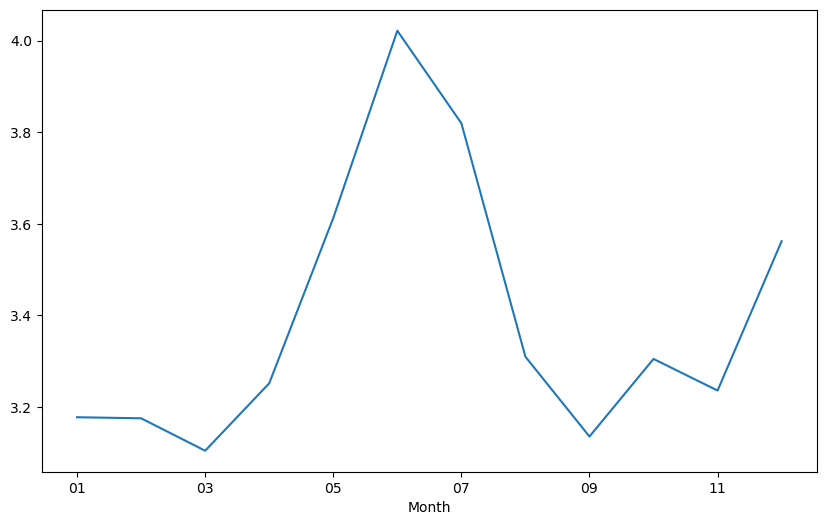

In [20]:
#plot the monthly averaged in the last decades
file2.groupby('Month')['WS'].mean().plot()
plt.gcf().set_size_inches(10,6)
plt.show()

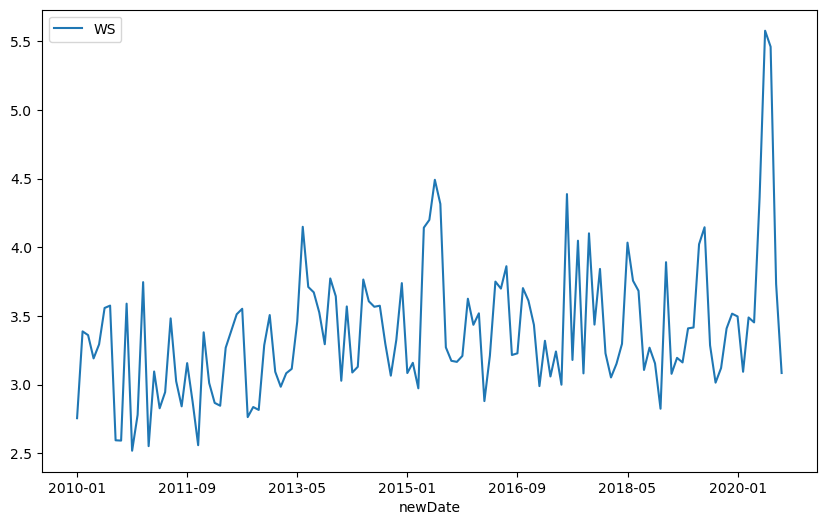

In [21]:
#plot the monthly averaged wind speed by time series
WIND_data_select_1 = file2.groupby('newDate')['WS'].mean().reset_index()
WIND_data_select_1.plot('newDate','WS')
# file2.groupby('newDate')['WS'].mean().plot()
plt.gcf().set_size_inches(10,6)
plt.show()

In Shenzhen, the wind speed is higher in summer (from July to September) while lower in spring (from Janunary to April). The inter-annual variation is different in last decades, with the highest wind speed appeared in 2017-09 and 2014-07.

### 数据筛选有误，原代码筛选的风速存在风速等于999的情况，导致部分月份存在月平均风速超大的情况，如40m/s。
### 助教修改了数据筛选的代码👇
### file2 = file.drop(index=file[file['Q']==2&3&6&7].index) 修改为👇
### file["WIND_type"]=file["WND"].astype(str).str[6]
### file2 = file.loc[(file["WIND_type"]!="9")&(file["WS"]!="9999")&(file["Q"]=="1")]
### 注意代码：file2.groupby('Month').mean()['WS'].plot()  代码在不同的pandas版本无法执行，需要修改为  file2.groupby('Month')['WS'].mean().plot()
### 注意代码： file2.groupby('newDate').mean()['WS'].plot() 问题同上
### 注意逻辑，应该在groupby()分组后，提取'WS'变量，再计算平均值
### 得分 8/10
### ---------------------------------------------------------------------------------------------

### PS3. Explore a data set

In [22]:
data = pd.read_csv('windstation.csv')
data

,Date/Time,Speed 100 m [m/s],Speed 100 m SD [m/s],Speed 100 m Max [m/s],...,Speed 10 m [m/s],Speed 10 m SD [m/s],Speed 10 m Max [m/s],Speed 10 m Min [m/s]
0,2014/1/1 0:00,6.7,0.5,7.9,...,2.3,0.3,3.5,1.6
1,2014/1/1 0:10,7.7,0.4,8.7,...,2.8,0.3,3.8,1.9
2,2014/1/1 0:20,7.2,0.5,8.7,...,2.6,0.4,3.8,1.9
3,2014/1/1 0:30,6.8,0.5,7.9,...,2.3,0.3,3.1,1.6
4,2014/1/1 0:40,6.5,0.4,7.2,...,2.5,0.3,3.5,1.9
...,...,...,...,...,...,...,...,...,...
105115,2015/12/31 23:10,1.7,0.3,2.2,...,0.6,0.2,1.2,0.4
105116,2015/12/31 23:20,1.4,0.4,2.2,...,0.5,0.1,0.8,0.4
105117,2015/12/31 23:30,2.1,0.4,3,...,0.5,0.2,1.2,0.4
105118,2015/12/31 23:40,2.2,0.2,2.6,...,0.7,0.3,1.2,0.4


In [23]:
# clean the data
data_clean = data.drop(index=data[(np.isnan(data['Speed 100 m [m/s]'])) 
                                  & (np.isnan(data['Speed 10 m [m/s]'])) 
                                  & (np.isnan(data['Speed 30 m [m/s]'])) 
                                  & (np.isnan(data['Speed 50 m [m/s]'])) 
                                  & (np.isnan(data['Speed 70 m [m/s]']))
                                  & (np.isnan(data['Speed 80 m [m/s]']))  
                                  & (np.isnan(data['Speed 90 m [m/s]']))].index)

In [24]:
def setNewDate(DATE):

    return DATE.split('/')[0] + '-' + DATE.split('/')[1].zfill(2) + '-' + DATE.split('/')[2].split(' ')[0].zfill(2)


In [25]:
data_clean['newDate'] = data_clean.apply(lambda col: setNewDate(col['Date/Time']),axis=1)

In [26]:
data_clean

,Date/Time,Speed 100 m [m/s],Speed 100 m SD [m/s],Speed 100 m Max [m/s],...,Speed 10 m SD [m/s],Speed 10 m Max [m/s],Speed 10 m Min [m/s],newDate
0,2014/1/1 0:00,6.7,0.5,7.9,...,0.3,3.5,1.6,2014-01-01
1,2014/1/1 0:10,7.7,0.4,8.7,...,0.3,3.8,1.9,2014-01-01
2,2014/1/1 0:20,7.2,0.5,8.7,...,0.4,3.8,1.9,2014-01-01
3,2014/1/1 0:30,6.8,0.5,7.9,...,0.3,3.1,1.6,2014-01-01
4,2014/1/1 0:40,6.5,0.4,7.2,...,0.3,3.5,1.9,2014-01-01
...,...,...,...,...,...,...,...,...,...
105115,2015/12/31 23:10,1.7,0.3,2.2,...,0.2,1.2,0.4,2015-12-31
105116,2015/12/31 23:20,1.4,0.4,2.2,...,0.1,0.8,0.4,2015-12-31
105117,2015/12/31 23:30,2.1,0.4,3,...,0.2,1.2,0.4,2015-12-31
105118,2015/12/31 23:40,2.2,0.2,2.6,...,0.3,1.2,0.4,2015-12-31


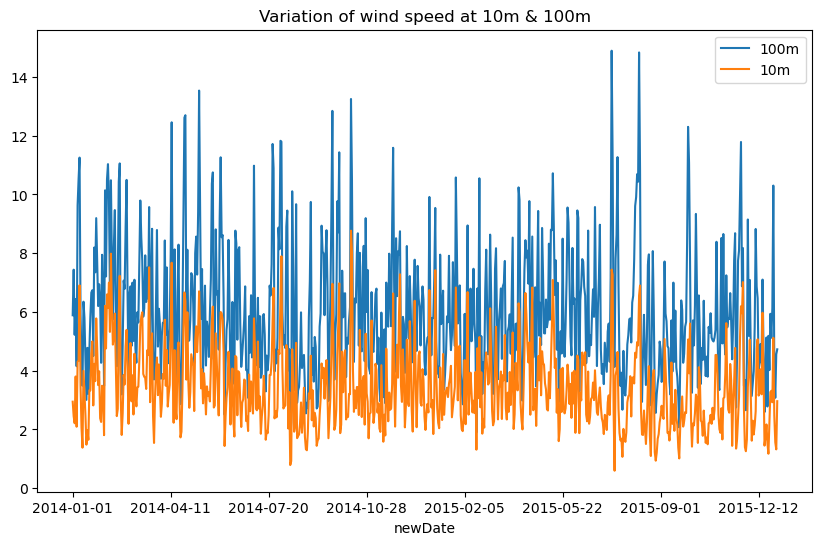

In [27]:
data_clean.groupby('newDate')['Speed 100 m [m/s]'].mean().plot()
plt.gcf().set_size_inches(10,6)


data_clean.groupby('newDate')['Speed 10 m [m/s]'].mean().plot()
plt.gcf().set_size_inches(10,6)
plt.legend(['100m','10m'])
plt.title('Variation of wind speed at 10m & 100m')

plt.show()

In [28]:
#simple statistical checks
mean100 = np.mean(data_clean['Speed 100 m [m/s]'])
mean10 = np.mean(data_clean['Speed 10 m [m/s]'])

median100 = np.median(data_clean['Speed 100 m [m/s]'])
median10 = np.median(data_clean['Speed 10 m [m/s]'])

variance100 = np.var(data_clean['Speed 100 m [m/s]'])
variance10 = np.var(data_clean['Speed 10 m [m/s]'])

#standard deviation
std100 = np.std(data_clean['Speed 100 m [m/s]'])
std10 = np.std(data_clean['Speed 10 m [m/s]'])

skewness100 = skew(data_clean['Speed 100 m [m/s]'])
skewness10 = skew(data_clean['Speed 10 m [m/s]'])

print(f'Mean wind speed at 100m and 10m : {round(mean100,2)} m/s, {round(mean10,2)} m/s;')
print(f'Median wind speed at 100m and 10m : {round(median100,2)} m/s, {round(median10,2)} m/s;')
print(f'Variance of wind speed at 100m and 10m : {round(variance100,2)} m/s, {round(variance10,2)} m/s;')
print(f'Standard deviation of wind speed at 100m and 10m : {round(std100,2)} m/s, {round(std10,2)} m/s;')
print(f'Skewness of wind speed at 100m and 10m : {round(skewness100,2)} m/s, {round(skewness10,2)} m/s;')


Mean wind speed at 100m and 10m : 6.06 m/s, 3.44 m/s;
Median wind speed at 100m and 10m : 5.7 m/s, 3.2 m/s;
Variance of wind speed at 100m and 10m : 8.41 m/s, 3.64 m/s;
Standard deviation of wind speed at 100m and 10m : 2.9 m/s, 1.91 m/s;
Skewness of wind speed at 100m and 10m : 0.77 m/s, 0.8 m/s;


In [29]:
#Check the distribution of wind speed: 2-Weibull distribution
def f_weibull(x, beta, alpha):
    return (beta/alpha)*((x/alpha)**(beta-1))*math.exp(-(x/alpha)**beta)

### Distribution of 100m wind speed:

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: L-BFGS-B
Failures / Right censored: 103162/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         6.83996       0.0102418   6.81991   6.86006
     Beta         2.19151      0.00518093   2.18138   2.20169 

Goodness of fit   Value
 Log-likelihood -252077
           AICc  504159
            BIC  504178
             AD 220.553 



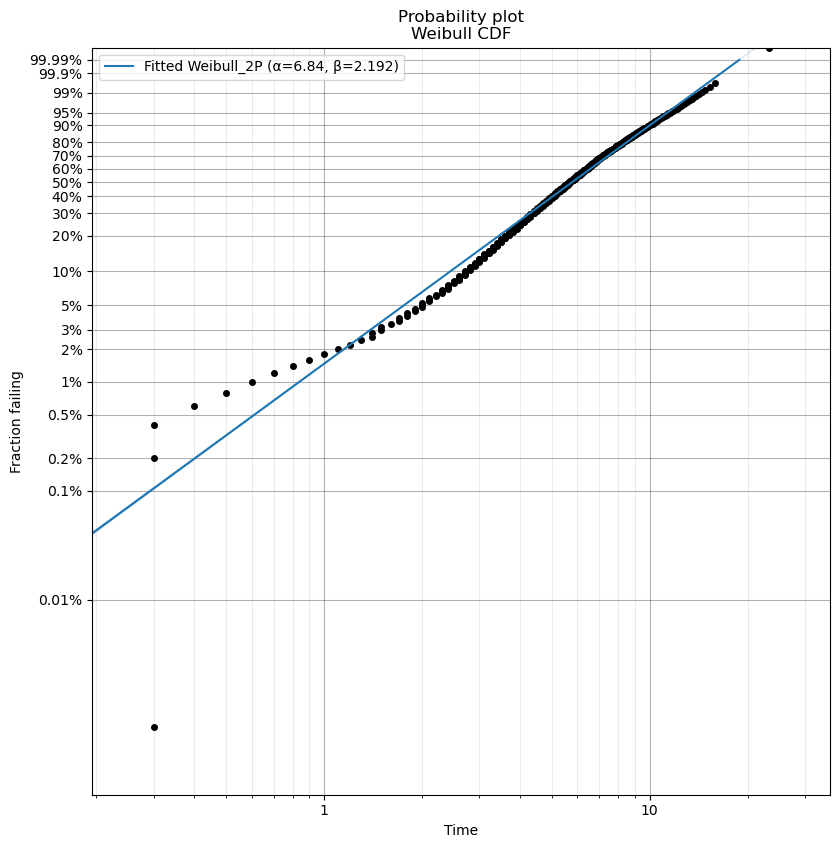

In [30]:
wb_100 = rel.Fitters.Fit_Weibull_2P(failures=data_clean['Speed 100 m [m/s]'].values,print_results=True,show_probability_plot=True)                                   

d:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


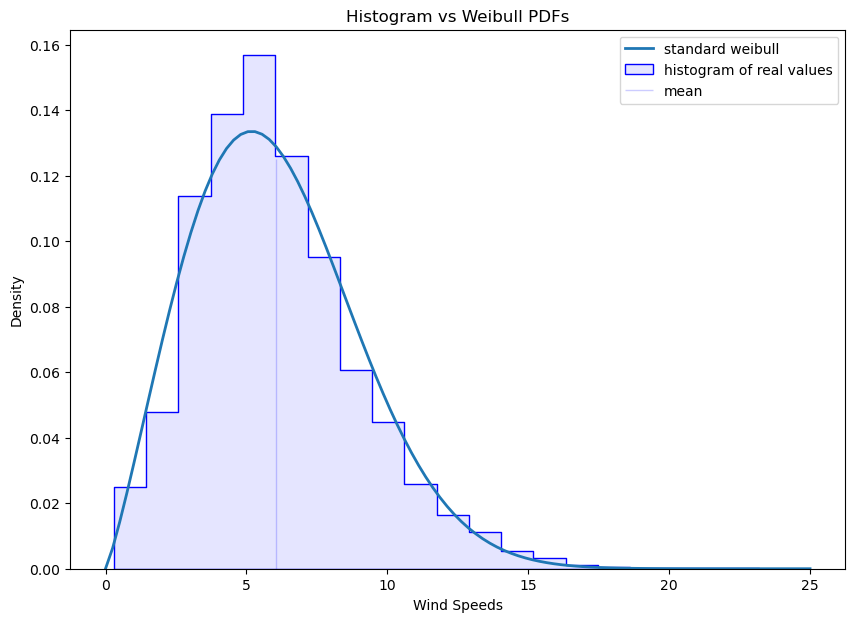

In [31]:
bin_count=100
#we sample bin_count number of times from a space of (0,25)
#the maximum wind speed is less than 25 m/s
tries = np.linspace(0,25,bin_count)
beta = wb_100.beta
alpha = wb_100.alpha
glob_pdf = [f_weibull(i, beta, alpha) for i in tries]


fix, ax = plt.subplots(1,1, figsize=(10,7))

ax.set_title('Histogram vs Weibull PDFs')

d1, = ax.plot(tries, glob_pdf, linewidth='2', alpha=1, label='standard weibull')
d2 = sns.histplot(data_clean['Speed 100 m [m/s]'], bins = 20, stat='density', element='step', alpha=0.1, label='histogram of real values', color='b')
d4 = plt.vlines(np.mean(data_clean['Speed 100 m [m/s]']), ymin=0, ymax=0.125, linewidth=1, alpha=0.2, color='blue', label='mean')

ax.set_xlabel('Wind Speeds')

ax.legend()

### Distribution of 10m wind speed:

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 103162/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         3.87474      0.00678067   3.86147   3.88805
     Beta         1.87301      0.00452186   1.86416   1.88189 

Goodness of fit   Value
 Log-likelihood -205831
           AICc  411666
            BIC  411685
             AD 113.843 



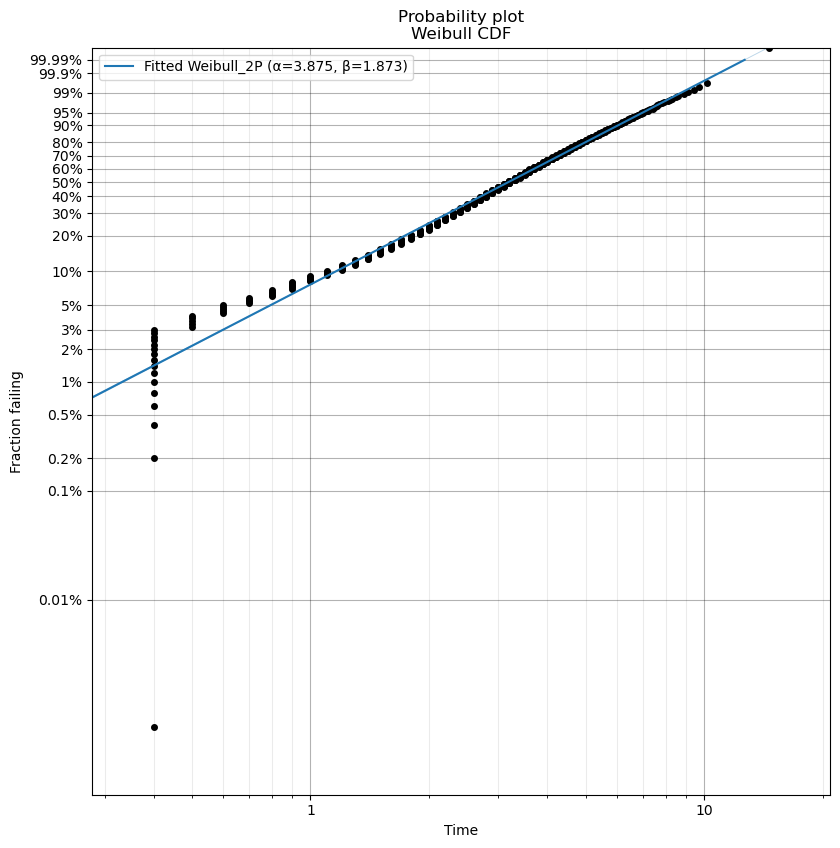

In [32]:
wb_10 = rel.Fitters.Fit_Weibull_2P(failures=data_clean['Speed 10 m [m/s]'].values,print_results=True,show_probability_plot=True)


d:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\software\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


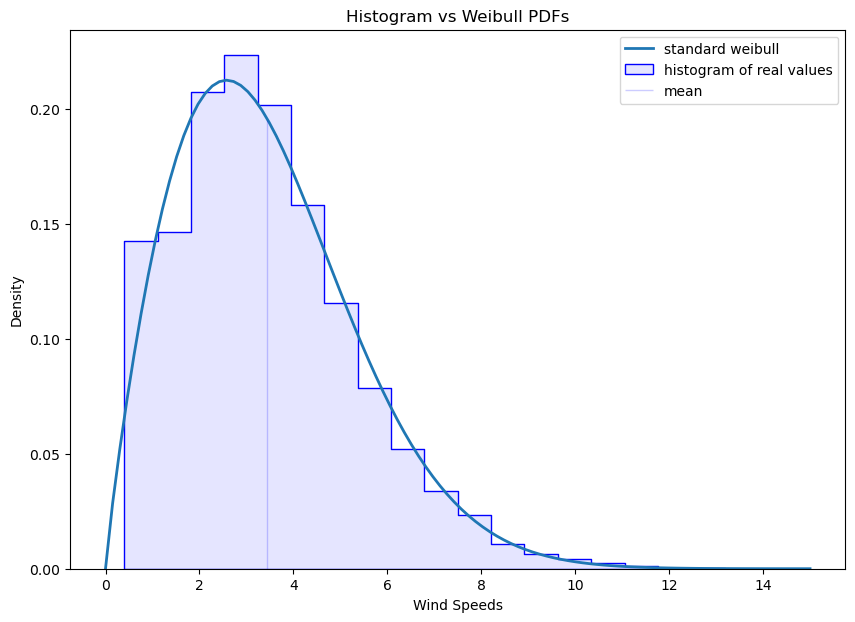

In [33]:
bin_count=100
tries = np.linspace(0,15,bin_count)
beta = wb_10.beta
alpha = wb_10.alpha
glob_pdf = [f_weibull(i, beta, alpha) for i in tries]


fix, ax = plt.subplots(1,1, figsize=(10,7))

ax.set_title('Histogram vs Weibull PDFs')

d1, = ax.plot(tries, glob_pdf, linewidth='2', alpha=1, label='standard weibull')
d2 = sns.histplot(data_clean['Speed 10 m [m/s]'], bins = 20, stat='density', element='step', alpha=0.1, label='histogram of real values', color='b')
d4 = plt.vlines(np.mean(data_clean['Speed 10 m [m/s]']), ymin=0, ymax=0.195, linewidth=1, alpha=0.2, color='blue', label='mean')

ax.set_xlabel('Wind Speeds')

ax.legend()

The wind speed becomes higher when the hub height is higher.

In general, the distribution of wind speeds conforms to the 2-parameter-Weibull distribution. Comparing the distribution of wind speed data at different heights for the same site, the two parameters (Alpha, Beta) of the Weibull distribution are 6.8 and 2.2 at 100 meters and 3.9 and 1.9 at 10 meters.

### 代码运行结果正确，数据预处理正确，绘制图件正确，统计检查正确，分析内容丰富。
### 得分 16/15
### ---------------------------------------------------------------------------------------------